## Import necessary libraries

In [1]:
import pandas as pd  
import numpy as np  
import nltk 
from nltk.tokenize import word_tokenize
import string
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.multioutput import MultiOutputClassifier
from sklearn.pipeline import Pipeline
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
import seaborn as sns
import matplotlib.pyplot as plt
from prettytable import PrettyTable
import joblib


## Read Non Medical Dataset

In [2]:
data=pd.read_csv(r"Dataset\NON_Medical_Data.csv")
data

,label,Specialization,text,Result
0,Unknown,Unknown,Health experts said it is too early to predict...,0
1,Unknown,Unknown,"""Accidentally put grown-up toothpaste on my to...",0
2,Unknown,Unknown,"""Who's that behind you?"" an anchor for New Yor...",0
3,Unknown,Unknown,White House officials say the crux of the pres...,0
4,Unknown,Unknown,Hurricane Fiona lashed the Turks and Caicos Is...,0
...,...,...,...,...
59557,Unknown,Unknown,"Amid cheers and the occasional ""Here we go!"" f...",0
59558,Unknown,Unknown,I don't think people who play Zynga games are ...,0
59559,Unknown,Unknown,He was appointed with a fair bit of fanfare as...,0
59560,Unknown,Unknown,"Afterward, Azarenka, more effusive with the pr...",0


In [3]:
data.drop(columns='Specialization',axis=1,inplace=True)

In [4]:
data.head()

,label,text,Result
0,Unknown,Health experts said it is too early to predict...,0
1,Unknown,"""Accidentally put grown-up toothpaste on my to...",0
2,Unknown,"""Who's that behind you?"" an anchor for New Yor...",0
3,Unknown,White House officials say the crux of the pres...,0
4,Unknown,Hurricane Fiona lashed the Turks and Caicos Is...,0


## Read Medical Dataset

In [5]:
medical_data=pd.read_csv(r"Dataset\Symptom(medical).csv")
medical_data

,label,Specialization,text
0,Psoriasis,Dermatology (Skin-related),I have been encountering a skin hasty on my ar...
1,Psoriasis,Dermatology (Skin-related),"My skin has been peeling, particularly on my k..."
2,Psoriasis,Dermatology (Skin-related),I have been encountering joint torment in my f...
3,Psoriasis,Dermatology (Skin-related),"There's a silver like cleaning on my skin, par..."
4,Psoriasis,Dermatology (Skin-related),"My nails have little marks or pits in them, an..."
...,...,...,...
3595,diabetes,Endocrinology (Hormonal Disorders),These strong desires and the need to urinate o...
3596,diabetes,Endocrinology (Hormonal Disorders),"I have trouble breathing, especially outside. ..."
3597,diabetes,Endocrinology (Hormonal Disorders),"I find it difficult to breathe, especially out..."
3598,diabetes,Endocrinology (Hormonal Disorders),I constantly sneeze and have a dry cough. My i...


## Clean Medical Data

In [6]:
medical_data['Specialization'] = medical_data['Specialization'].replace('Cardiology (Heart and Circulatory System)', 'Cardiology')

In [7]:
medical_data['Specialization'] = medical_data['Specialization'].replace('Rheumatology (Joint and Musculoskeletal Diseases)', 'Rheumatology')

In [8]:
medical_data['Specialization'] = medical_data['Specialization'].replace('Pulmonology (Respiratory Diseases)', 'Respiratory Diseases')

In [9]:
medical_data['Specialization'] = medical_data['Specialization'].replace('Neurology (Brain and Nervous System)', 'Neurology')

In [10]:
medical_data['Specialization'] = medical_data['Specialization'].replace('Gastroenterology (Digestive System)', 'Gastroenterology')

In [11]:
medical_data['Specialization'] = medical_data['Specialization'].replace('Endocrinology (Hormonal Disorders)', 'Endocrinology')

In [12]:
medical_data["Specialization"].unique()

array(['Dermatology (Skin-related)', 'Vascular Medicine',
       'Infectious Diseases', 'Gastroenterology', 'Rheumatology',
       'Respiratory Diseases', 'Cardiology', 'Neurology',
       'Allergy and Immunology', 'Endocrinology'], dtype=object)

In [13]:
medical_data['label'] = medical_data['label'] + ' - Specialization: ' + medical_data['Specialization']

In [14]:
medical_data.drop(columns='Specialization',axis=1,inplace=True)

## Add Result Column

In [15]:
medical_data['Result'] = 1

In [16]:
medical_data

,label,text,Result
0,Psoriasis - Specialization: Dermatology (Skin-...,I have been encountering a skin hasty on my ar...,1
1,Psoriasis - Specialization: Dermatology (Skin-...,"My skin has been peeling, particularly on my k...",1
2,Psoriasis - Specialization: Dermatology (Skin-...,I have been encountering joint torment in my f...,1
3,Psoriasis - Specialization: Dermatology (Skin-...,"There's a silver like cleaning on my skin, par...",1
4,Psoriasis - Specialization: Dermatology (Skin-...,"My nails have little marks or pits in them, an...",1
...,...,...,...
3595,diabetes - Specialization: Endocrinology,These strong desires and the need to urinate o...,1
3596,diabetes - Specialization: Endocrinology,"I have trouble breathing, especially outside. ...",1
3597,diabetes - Specialization: Endocrinology,"I find it difficult to breathe, especially out...",1
3598,diabetes - Specialization: Endocrinology,I constantly sneeze and have a dry cough. My i...,1


## Concat Medical & Non Medical

In [17]:
num_samples = 10000
data=data.sample(n=num_samples,random_state=42)

In [18]:
df=pd.concat([data,medical_data],axis=0)
df.reset_index(drop=True,inplace=True)
df.head()

,label,text,Result
0,Unknown,Everyone knows that divorce is rampant in Amer...,0
1,Unknown,I have developed the following survival plan t...,0
2,Unknown,"""How dare Republicans demand civility as they ...",0
3,Unknown,It's impossible to nail down my favorite parts...,0
4,Unknown,Sixteen $1 billion-plus weather- and climate-r...,0


In [19]:
df=df.sample(frac=1,random_state=42).reset_index(drop=True)

In [20]:
df = df.dropna(subset=["text"]).reset_index(drop=True)

In [21]:
df

,label,text,Result
0,Dengue - Specialization: Infectious Diseases,"I have been suffering from excruciating, never...",1
1,Unknown,"The homicidal, Michael Jackson-esque character...",0
2,Unknown,With committed performances and no holier-than...,0
3,Unknown,"A year later, I have added a bunch of new mant...",0
4,Unknown,"""Democrats betrayed her,"" the Fox News host sa...",0
...,...,...,...
13595,Unknown,Money! It's what he didn't want. The Formula O...,0
13596,peptic ulcer disease - Specialization: Gastroe...,Both my appetite and ongoing hunger are fierce...,1
13597,Unknown,Beauty tips that will instantly make you look ...,0
13598,Unknown,"The closer we traveled to Uganda and Rwanda, w...",0


## Preprocess Data

In [23]:
df["text"] = df["text"].astype(str).replace("nan", "", regex=True)

In [24]:
stop_words = set(stopwords.words("english")) - {"not", "no"}
lemmatizer = WordNetLemmatizer()


def preprocess_text(text):
    if not isinstance(text, str) or text.strip() == "":  
        return ""

    text = text.lower()  
    text = text.translate(str.maketrans('', '', string.punctuation))  
    tokens = word_tokenize(text)  
    tokens = [word for word in tokens if word not in stop_words and word.isalpha()]  
    tokens = [lemmatizer.lemmatize(word) for word in tokens]  
    return ' '.join(tokens)  


In [25]:
df["text"] = df["text"].fillna("").apply(preprocess_text)

In [26]:
df["text"] = df["text"].apply(preprocess_text)

## Preprocess For Balanced Data

In [27]:
medical_data = df[df["Result"] == 1]  
non_medical_data = df[df["Result"] == 0].sample(n=7811, random_state=42) 
balanced_data = pd.concat([medical_data, non_medical_data])
balanced_data = balanced_data.sample(frac=1, random_state=42).reset_index(drop=True)

In [28]:
balanced_data = balanced_data.drop_duplicates().reset_index(drop=True)

## Save Final File

In [29]:
df.to_csv("final_balanced_data.csv",index=False)

## Split Data (Check Medical OR Non Medical)

In [31]:
X1=balanced_data.text
Y1=balanced_data.Result

In [32]:
X1_train, X1_test, Y1_train, Y1_test = train_test_split(X1, Y1, test_size=0.2, random_state=42,stratify=Y1)

## Pipline for medical classifier (First Model)

In [33]:
medical_classifier = Pipeline([
    ('tfidf', TfidfVectorizer(preprocessor=preprocess_text)),  
    ('classifier', MultinomialNB())  
])

In [35]:
medical_classifier.fit(X1_train, Y1_train)

Pipeline(steps=[('tfidf',
                 TfidfVectorizer(preprocessor=<function preprocess_text at 0x0000029C492B3940>)),
                ('classifier', MultinomialNB())])

In [36]:
print(medical_classifier.score(X1_test, Y1_test))

0.9991166077738516


In [37]:
"""
new_text = ["I have been feeling itchy, unsteady, and very tired. Also, I've gotten lighter and have a fever. 
My pee is dark, and my skin has turned yellow. Also, my stomach hurts"]  

prediction = medical_classifier.predict(new_text)

if prediction[0] == 1:
    print("Medical - How can I assist you with your health concern?")
else:
    print("It looks like your message isn't related to the medical field. Feel free to ask about any health-related topic—I'm here to help You")
"""


'\nnew_text = ["I have been feeling itchy, unsteady, and very tired. Also, I\'ve gotten lighter and have a fever. \nMy pee is dark, and my skin has turned yellow. Also, my stomach hurts"]  \n\nprediction = medical_classifier.predict(new_text)\n\nif prediction[0] == 1:\n    print("Medical - How can I assist you with your health concern?")\nelse:\n    print("It looks like your message isn\'t related to the medical field. Feel free to ask about any health-related topic—I\'m here to help You")\n'

## Split Data For Disease Classifier (Seconed Model)

In [38]:
X2 = balanced_data[balanced_data["Result"] == 1]["text"]
Y2 = balanced_data[balanced_data["Result"] == 1]["label"]

In [39]:
X2_train, X2_test, Y2_train, Y2_test = train_test_split(X2, Y2, test_size=0.2, random_state=42,stratify=Y2)

## Naive Bayes Model

In [40]:
disease_classifier = Pipeline([
    ('tfidf', TfidfVectorizer(preprocessor=preprocess_text)),  
    ('classifier', MultinomialNB())  
])

In [41]:
disease_classifier.fit(X2_train, Y2_train)

Pipeline(steps=[('tfidf',
                 TfidfVectorizer(preprocessor=<function preprocess_text at 0x0000029C492B3940>)),
                ('classifier', MultinomialNB())])

In [42]:
print(disease_classifier.score(X2_train, Y2_train))

0.9857448325017819


In [43]:
Y2_test_pred = disease_classifier.predict(X2_test)
NV_ACC = disease_classifier.score(X2_test, Y2_test)
NV_ACC

0.9643874643874644

## XGboost Model

In [44]:
Xxg_train, Xxg_test, Yxg_train, Yxg_test = train_test_split(X2, Y2, test_size=0.2, random_state=42)

In [45]:
label_encoder = LabelEncoder()
Yxg_train_encoded = label_encoder.fit_transform(Yxg_train)
Yxg_test_encoded = label_encoder.transform(Yxg_test)

In [46]:
disease_classifier = Pipeline([
    ('tfidf', TfidfVectorizer(preprocessor=preprocess_text)),
    ('classifier', XGBClassifier(use_label_encoder=False))  
])

In [47]:
import sklearn
print(sklearn.__version__)


1.6.1


In [49]:
disease_classifier.fit(Xxg_train, Yxg_train_encoded)


c:\Users\NooR\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\core.py:158: UserWarning: [17:51:13] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Pipeline(steps=[('tfidf',
                 TfidfVectorizer(preprocessor=<function preprocess_text at 0x0000029C492B3940>)),
                ('classifier',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None, device=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, gamma=Non...one,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None,
                               objective='multi:softprob', ...))])

In [50]:
disease_classifier.score(Xxg_train, Yxg_train_encoded)

1.0

In [51]:
XGB_ACC = disease_classifier.score(Xxg_test, Yxg_test_encoded)
XGB_ACC

0.9415954415954416

## Logistic Regression

In [52]:
disease_classifier = Pipeline([
    ('tfidf', TfidfVectorizer(preprocessor=preprocess_text)),
    ('classifier', LogisticRegression(max_iter=1000))  
])

In [53]:
Xlg_train, Xlg_test, Ylg_train, Ylg_test = train_test_split(X2, Y2, test_size=0.2, random_state=42)

In [54]:
Ylg_train_encoded = label_encoder.fit_transform(Ylg_train)
Ylg_test_encoded = label_encoder.transform(Ylg_test)

In [55]:
disease_classifier.fit(Xlg_train, Ylg_train_encoded)

Pipeline(steps=[('tfidf',
                 TfidfVectorizer(preprocessor=<function preprocess_text at 0x0000029C492B3940>)),
                ('classifier', LogisticRegression(max_iter=1000))])

In [56]:
disease_classifier.score(Xlg_train, Ylg_train_encoded)

0.9950106913756237

In [57]:
LR_ACC = disease_classifier.score(Xlg_test, Ylg_test_encoded)
LR_ACC

0.9843304843304843

## RandomForestClassifier Model

In [58]:
disease_classifier = Pipeline([
    ('tfidf', TfidfVectorizer(preprocessor=preprocess_text)),
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))  
])

In [59]:
Xrf_train, Xrf_test, Yrf_train, Yrf_test = train_test_split(X2, Y2, test_size=0.2, random_state=42)

In [60]:
Yrf_train_encoded = label_encoder.fit_transform(Yrf_train)
Yrf_test_encoded = label_encoder.transform(Yrf_test)

In [61]:
disease_classifier.fit(Xrf_train, Yrf_train_encoded)

Pipeline(steps=[('tfidf',
                 TfidfVectorizer(preprocessor=<function preprocess_text at 0x0000029C492B3940>)),
                ('classifier', RandomForestClassifier(random_state=42))])

In [62]:
disease_classifier.score(Xrf_train, Yrf_train_encoded)

1.0

In [63]:
RF_ACC =disease_classifier.score(Xrf_test, Yrf_test_encoded)
RF_ACC

0.9743589743589743

## Grid Search

In [64]:
models={
    'Naive Bayes': MultinomialNB(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(probability=True),
    'Logistic Regression': LogisticRegression(),
    'XGBoost': XGBClassifier(use_label_encoder=False)
}

In [65]:
param_grid = [
    {
        'classifier': [MultinomialNB()],
        'classifier__alpha': [0.1, 0.5, 1.0]
    },
    {
        'classifier': [RandomForestClassifier()],
        'classifier__n_estimators': [100, 200, 500],
        'classifier__max_depth': [None, 10, 20],
    },
    {
        'classifier': [SVC(probability=True)],
        'classifier__kernel': ['linear', 'rbf'],
        'classifier__C': [0.1, 1, 10]
    },
    {
        'classifier': [LogisticRegression(max_iter=1000)],
        'classifier__C': [0.1, 1, 10]
    },
    {
        'classifier': [XGBClassifier(use_label_encoder=False)],
        'classifier__n_estimators': [100, 200, 500],
        'classifier__max_depth': [3, 6, 10]
    }
]

In [66]:
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(preprocessor=preprocess_text)),
    ('classifier', MultinomialNB())  
])

In [67]:
grid_search=GridSearchCV(pipeline, param_grid, cv=5, n_jobs=2, verbose=3)
grid_search

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('tfidf',
                                        TfidfVectorizer(preprocessor=<function preprocess_text at 0x0000029C492B3940>)),
                                       ('classifier', MultinomialNB())]),
             n_jobs=2,
             param_grid=[{'classifier': [MultinomialNB()],
                          'classifier__alpha': [0.1, 0.5, 1.0]},
                         {'classifier': [RandomForestClassifier()],
                          'classifier__max_depth': [None, 10, 20],
                          'classifier__n_estima...
                                                       max_bin=None,
                                                       max_cat_threshold=None,
                                                       max_cat_to_onehot=None,
                                                       max_delta_step=None,
                                                       max_depth=None,
                                                       max_leaves=None,
                                                       min_child_weight=None,
                                                       missing=nan,
                                                       monotone_constraints=None,
                                                       multi_strategy=None,
                                                       n_estimators=None,
                                                       n_jobs=None,
                                                       num_parallel_tree=None,
                                                       random_state=None, ...)],
                          'classifier__max_depth': [3, 6, 10],
                          'classifier__n_estimators': [100, 200, 500]}],
             verbose=3)

In [68]:
X_train_grid, X_test_grid, Y_train_grid, Y_test_grid = train_test_split(X2, Y2, test_size=0.2, random_state=42)

In [69]:
label_encoder = LabelEncoder()
Y_train_grid_encoded = label_encoder.fit_transform(Y_train_grid)
Y_test_grid_encoded = label_encoder.transform(Y_test_grid)

In [70]:
#model = pipeline.fit(X_train_grid, Y_train_grid_encoded)
#print("Pipeline trained successfully!")


In [71]:
#grid_search = GridSearchCV(pipeline, param_grid, cv=5, n_jobs=1)


In [72]:
grid_search.fit(X_train_grid, Y_train_grid_encoded)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('tfidf',
                                        TfidfVectorizer(preprocessor=<function preprocess_text at 0x0000029C492B3940>)),
                                       ('classifier', MultinomialNB())]),
             n_jobs=2,
             param_grid=[{'classifier': [MultinomialNB()],
                          'classifier__alpha': [0.1, 0.5, 1.0]},
                         {'classifier': [RandomForestClassifier()],
                          'classifier__max_depth': [None, 10, 20],
                          'classifier__n_estima...
                                                       max_bin=None,
                                                       max_cat_threshold=None,
                                                       max_cat_to_onehot=None,
                                                       max_delta_step=None,
                                                       max_depth=None,
                                                       max_leaves=None,
                                                       min_child_weight=None,
                                                       missing=nan,
                                                       monotone_constraints=None,
                                                       multi_strategy=None,
                                                       n_estimators=None,
                                                       n_jobs=None,
                                                       num_parallel_tree=None,
                                                       random_state=None, ...)],
                          'classifier__max_depth': [3, 6, 10],
                          'classifier__n_estimators': [100, 200, 500]}],
             verbose=3)

In [79]:
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)       #train Acc

Best Parameters: {'classifier': SVC(probability=True), 'classifier__C': 10, 'classifier__kernel': 'linear'}
Best Score: 0.991800990858977


In [80]:
best_model = grid_search.best_estimator_
GR_ACC = best_model.score(X_test_grid, Y_test_grid_encoded)
print("Test Accuracy:", GR_ACC)

Test Accuracy: 0.9943019943019943


In [81]:
best_model = grid_search.best_estimator_
best_model

Pipeline(steps=[('tfidf',
                 TfidfVectorizer(preprocessor=<function preprocess_text at 0x000001D425282040>)),
                ('classifier', SVC(C=10, kernel='linear', probability=True))])

## Final Pipline

In [82]:
def final_pipeline(input_text):
    processed_text = preprocess_text(input_text)

    is_medical = medical_classifier.predict([processed_text])[0]
    
    if is_medical == 1:
        predicted_label_encoded = best_model.predict([processed_text])[0]
        disease_label = label_encoder.inverse_transform([predicted_label_encoded])[0]  
        return disease_label  
    else:
        return "I'm Sorry, Please Enter Medical text so I can help you."

## User Input

In [83]:
print("Hello! I'm here to assist you with any medical inquiries. Please enter your symptoms or medical condition.")
new_symptom = input("Enter your symptoms: ")

prediction = medical_classifier.predict([new_symptom])

if prediction[0] == 1:  
    predicted_label_encoded = best_model.predict([new_symptom])[0]
    disease_label = label_encoder.inverse_transform([predicted_label_encoded])[0]  
    
    print(f"Predicted: {disease_label}")
    print(f"🤖 I'm just an AI assistant providing an initial assessment. For your safety, please consult a doctor for an accurate diagnosis and proper medical advice. 🏥💙 ")
else:
    print("Sorry, please enter a text related to the medical field so I can assist you 🧠")

Hello! I'm here to assist you with any medical inquiries. Please enter your symptoms or medical condition.
Predicted: Bronchial Asthma - Specialization: Respiratory Diseases
🤖 I'm just an AI assistant providing an initial assessment. For your safety, please consult a doctor for an accurate diagnosis and proper medical advice. 🏥💙 


## Display Accuacy 


In [84]:

table = PrettyTable()
table.field_names = ["Model", "Accuracy"]

table.add_row(["Naive Bayes", NV_ACC])
table.add_row(["XGBoost", XGB_ACC])
table.add_row(["Logistic Regression", LR_ACC])
table.add_row(["Random Forest", RF_ACC])
table.add_row(["Test Score", GR_ACC])  

print(table)


+---------------------+--------------------+
|        Model        |      Accuracy      |
+---------------------+--------------------+
|     Naive Bayes     | 0.9643874643874644 |
|       XGBoost       | 0.9415954415954416 |
| Logistic Regression | 0.9843304843304843 |
|    Random Forest    | 0.9743589743589743 |
|      Test Score     | 0.9943019943019943 |
+---------------------+--------------------+


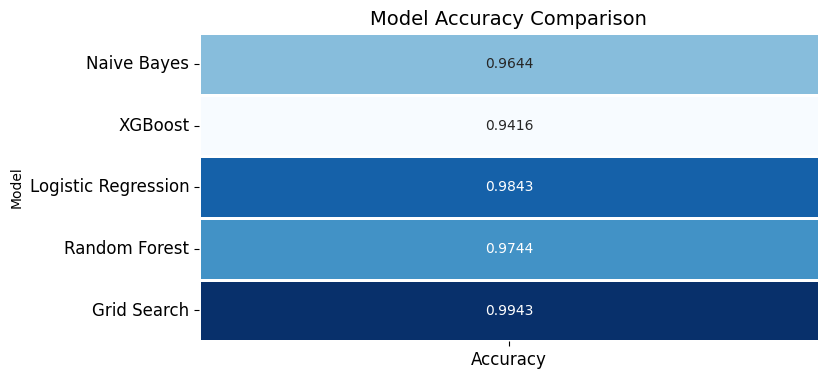

In [85]:


models_Accuracy = {
    "Model": ["Naive Bayes", "XGBoost", "Logistic Regression", "Random Forest", "Grid Search"],
    "Accuracy": [NV_ACC, XGB_ACC, LR_ACC, RF_ACC, GR_ACC]
}

df = pd.DataFrame(models_Accuracy)

plt.figure(figsize=(8, 4))
sns.heatmap(df.set_index("Model"), annot=True, fmt=".4f", cmap="Blues", linewidths=1, cbar=False)
plt.title("Model Accuracy Comparison", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12, rotation=0)
plt.show()





In [86]:

models_Accuracy = {
    "Model": ["Naive Bayes", "XGBoost", "Logistic Regression", "Random Forest", "Test Score"],
   
    "mean_test_score": [NV_ACC, XGB_ACC, LR_ACC, RF_ACC, GR_ACC]   
}

df = pd.DataFrame(models_Accuracy)

df = df.fillna("—")

print(df)


                 Model  mean_test_score
0          Naive Bayes         0.964387
1              XGBoost         0.941595
2  Logistic Regression         0.984330
3        Random Forest         0.974359
4           Test Score         0.994302


## Save Model 

In [87]:

models = {
    "medical_classifier": medical_classifier,
    "disease_and_specialization_classifier": disease_classifier,
    "label_encoder": label_encoder  
}

joblib.dump(models, "chatbot_models.pkl")


['chatbot_models.pkl']

In [88]:
import joblib
models = {
    "medical_classifier": medical_classifier,
    "disease_and_specialization_classifier": disease_classifier,
    "label_encoder": label_encoder,
    "preprocess_text": preprocess_text  
}

joblib.dump(models, "chatbot_models.pkl")

['chatbot_models.pkl']

In [89]:
models = joblib.load("chatbot_models.pkl")

medical_classifier = models["medical_classifier"]
disease_classifier = models["disease_and_specialization_classifier"]




In [90]:
from sklearn.base import BaseEstimator, ClassifierMixin
import joblib

class IntegratedMedicalModel(BaseEstimator, ClassifierMixin):
    def __init__(self):
        self.medical_classifier = None
        self.disease_classifier = None
        self.label_encoder = None
    
    def fit(self, X, y):
        return self
    
    def predict(self, X):
        is_medical = self.medical_classifier.predict(X)
        predictions = []
        for i, text in enumerate(X):
            if is_medical[i] == 1:
                disease_encoded = self.disease_classifier.predict([text])[0]
                disease = self.label_encoder.inverse_transform([disease_encoded])[0]
                predictions.append(disease)
            else:
                predictions.append("Non-medical")
        return predictions

full_model = IntegratedMedicalModel()
full_model.medical_classifier = medical_classifier  # النموذج الأول
full_model.disease_classifier = disease_classifier  # النموذج الثاني
full_model.label_encoder = label_encoder  # الـ LabelEncoder

joblib.dump(full_model, 'integrated_model.pkl')

['integrated_model.pkl']

In [91]:
loaded_model = joblib.load('integrated_model.pkl')
result = loaded_model.predict(["I have a headache"])
print(result)  

['Hypertension - Specialization: Cardiology']
